In [1]:
! pip install 'cebra[dev,demos]' 

In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jl
from scipy.integrate import solve_ivp
import matplotlib.gridspec as gridspec
import cebra.datasets
from cebra import CEBRA
import d_library as dl
import sklearn.linear_model
from matplotlib.animation import FuncAnimation

from matplotlib.collections import LineCollection
import pandas as pd

import pickle
from sklearn import manifold
from sklearn.decomposition import PCA


/opt/conda/lib/python3.9/site-packages/cebra/datasets/__init__.py:103: UserWarning: Could not initialize one or more datasets: No module named 'h5py'. For using the datasets, consider installing the [datasets] extension via pip.
  warnings.warn(f"Could not initialize one or more datasets: {e}. "


In [3]:
b_label_ = np.arange(0,10000,1)

In [4]:
def reconstruction_score(x, y):

    def _linear_fitting(x, y):
        lin_model = sklearn.linear_model.LinearRegression()
        lin_model.fit(x, y)
        return lin_model.score(x, y), lin_model.predict(x)

    return _linear_fitting(x, y)

In [5]:
    # define the path to the data
    data_path = os.path.abspath("/data")

    # Access the folder using args.folder
    folder = 'FIP_632105_2022-09-09_10-07-45'

    folder_path = os.path.join(data_path,folder)

    # get the path to the folder
    #folder_path = os.path.join(data_path,folder)
    print("folderpath(new version*):", folder_path)

folderpath(new version*): /data/FIP_632105_2022-09-09_10-07-45


In [6]:
def load_nm_data(nm_path):
    neural_data = pickle.load(open(nm_path, "rb"))
    return neural_data

In [7]:
neural_data = load_nm_data(os.path.abspath(folder_path + os.sep + '/neural_data.pkl'))

In [8]:
neural_data

,G1,R1,G2,R2
0,2.094560,1.045563,3.042983,1.491478
1,2.094560,1.045563,3.042983,1.491478
2,2.094560,1.045563,3.042983,1.491478
3,2.094560,1.045563,3.042983,1.491478
4,2.094560,1.045563,3.042983,1.491478
...,...,...,...,...
143324,0.752516,-0.282935,3.180394,-0.032431
143325,0.448264,-0.137051,3.486763,-0.071452
143326,0.876214,0.265041,3.858452,0.267402
143327,0.809007,0.183706,3.673878,-0.019689


<Axes: >

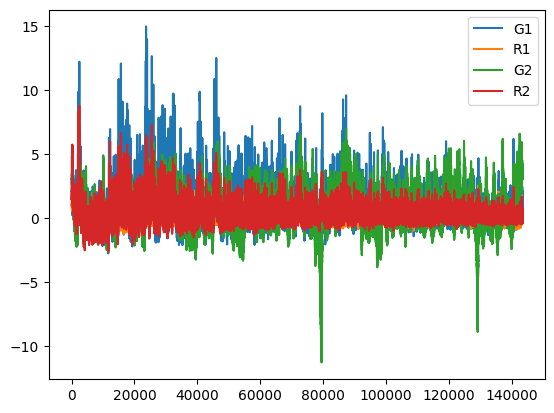

In [9]:
%matplotlib inline
neural_data.plot()

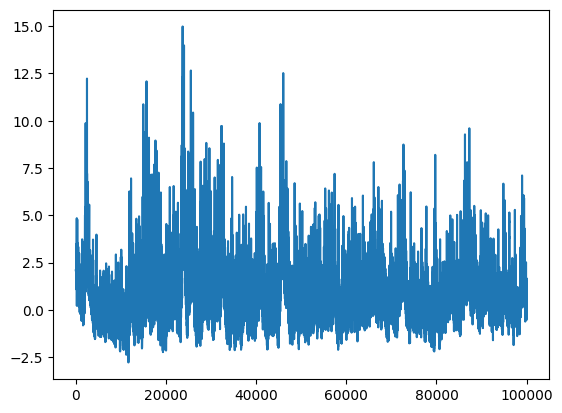

In [25]:
plt.plot(g1)

Start with discovery mode: CEBRA TIME, then try a run with CEBRA behaviour with the random auxiliary variable

In [39]:
a = np.random.randn(10000)

(array([   9.,   96.,  585., 1620., 2900., 2783., 1474.,  445.,   80.,
           8.]),
 array([-3.84646294, -3.06642297, -2.28638299, -1.50634301, -0.72630304,
         0.05373694,  0.83377692,  1.61381689,  2.39385687,  3.17389685,
         3.95393682]),
 <BarContainer object of 10 artists>)

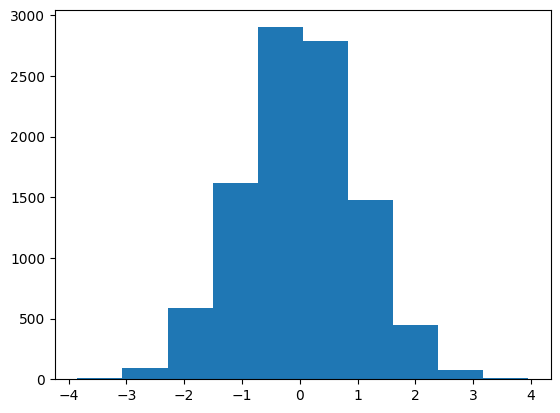

In [40]:
plt.hist(a)

In [10]:
neural_data['G1'].shape

(143329,)

In [11]:
g1 = neural_data['G1']

In [12]:
g1 = g1[:100000].to_numpy().reshape(100000,-1)

In [13]:
# make model and train 
cebra_model_nm = CEBRA(
    model_architecture="offset1-model-mse",
    batch_size=512,
    learning_rate=0.01,
    max_iterations=2000,
    delta=0.1,
    conditional='delta',
    output_dimension=3,
    distance='euclidean',
    device="cuda_if_available",
    num_hidden_units=64,
    verbose=True,
)

In [14]:
# compute embedding and view it
cebra_model_nm.fit(g1[:100000])

pos:  15448077762560.0000 neg: -6885940920320.0000 total:  8562136842240.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:13<00:00, 152.88it/s]   


CEBRA(batch_size=512, conditional='delta', delta=0.1, distance='euclidean',
      learning_rate=0.01, max_iterations=2000,
      model_architecture='offset1-model-mse', num_hidden_units=64,
      output_dimension=3, verbose=True)

In [15]:
embedding = cebra_model_nm.transform(g1)

In [16]:
score, transf_embed = reconstruction_score(embedding,g1)

<Axes3D: title={'center': 'g1'}>

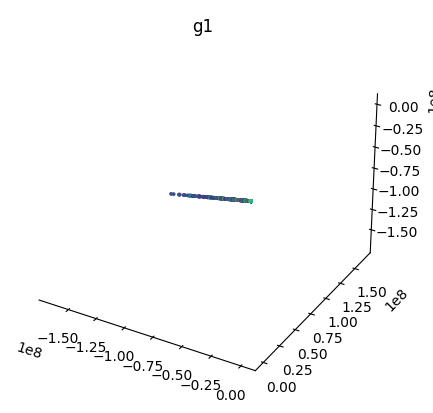

In [22]:
cebra.plot_embedding(embedding, embedding_labels='time', markersize=3, alpha=1, title='g1')

In [18]:
g1.shape[0]

100000

In [19]:
# now try using all the nms at once
model_all_nms, embed_all_nms = dl.base_embed(neural_data)

pos:  0.0035 neg:  6.1851 total:  6.1886 temperature:  1.0000: 100%|██████████| 1000/1000 [00:05<00:00, 188.60it/s]


<Axes3D: title={'center': 'All NMs'}>

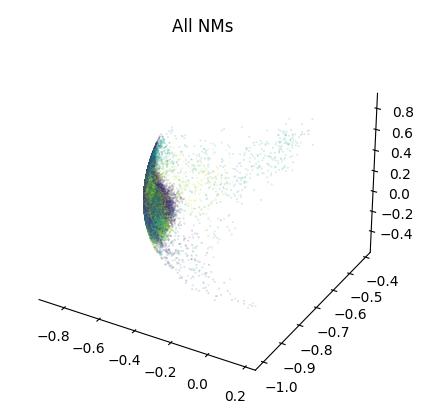

In [24]:
cebra.plot_embedding(embed_all_nms,embedding_labels='time', title='All NMs')